In [32]:
import json
import pandas as pd
import numpy as np
import statsapi as mlb
import seaborn as sb
import matplotlib.pyplot as plt

In [64]:
orioles_id = (mlb.lookup_team('orioles', activeStatus="Y", season=None, sportIds=1))[0]['id']

roster = mlb.get('team_roster', {'teamId': '110', 'season':'2023'})
roster_json = json.dumps(roster['roster'])
orioles_roster = pd.DataFrame.from_dict(roster['roster'])

personnel = []

for person in orioles_roster['person']:
    player = [person['id'], person['fullName'], person['link']]
    personnel.append(list(player)) 

personnel_information = []
for player_info in orioles_roster['position']:
    info = [player_info['name']]
    personnel_information.append(info)

player_and_positions = zip(personnel, personnel_information)

personnel = []
for player in player_and_positions:
    personnel.append(player[0].__add__(player[1]))

os_players_df = pd.DataFrame(personnel, columns=['id', 'fullName', 'link', 'position'])

position_df = os_players_df[['fullName', 'position']].groupby(['position']).count().reset_index()
position_df.columns = ['position', 'num_players']
position_df

        id           fullName                   link     position
0   543305        Aaron Hicks  /api/v1/people/543305   Outfielder
1   624428       Adam Frazier  /api/v1/people/624428  Second Base
2   668939    Adley Rutschman  /api/v1/people/668939      Catcher
3   623993  Anthony Santander  /api/v1/people/623993   Outfielder
4   669720        Austin Hays  /api/v1/people/669720   Outfielder
5   656775     Cedric Mullins  /api/v1/people/656775   Outfielder
6   672335       Cionel Perez  /api/v1/people/672335      Pitcher
7   669084            DL Hall  /api/v1/people/669084      Pitcher
8   543056     Danny Coulombe  /api/v1/people/543056      Pitcher
9   665152        Dean Kremer  /api/v1/people/665152      Pitcher
10  680570  Grayson Rodriguez  /api/v1/people/680570      Pitcher
11  683002   Gunnar Henderson  /api/v1/people/683002   Third Base
12  677008    Heston Kjerstad  /api/v1/people/677008   Outfielder
13  656427      Jack Flaherty  /api/v1/people/656427      Pitcher
14  657097

,position,num_players
0,Catcher,2
1,First Base,2
2,Outfielder,5
3,Pitcher,14
4,Second Base,2
5,Shortstop,1
6,Third Base,2


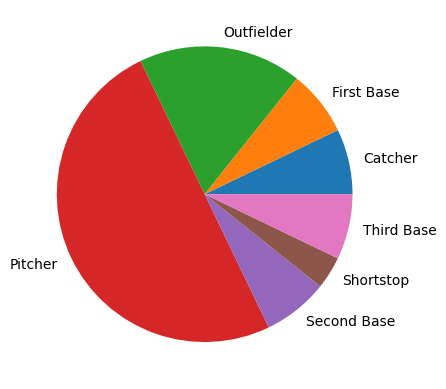

In [63]:
plt.pie(x=position_df['num_players'], labels=position_df['position'])
plt.show()